In [94]:
import numpy as np
import pandas as pd

In [95]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [96]:
y_train = train_data['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features], dtype='float32')
X_test = pd.get_dummies(test_data[['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch']], dtype='float32')
X_test

,PassengerId,Pclass,SibSp,Parch,Sex_female,Sex_male
0,892,3,0,0,0.0,1.0
1,893,3,1,0,1.0,0.0
2,894,2,0,0,0.0,1.0
3,895,3,0,0,0.0,1.0
4,896,3,1,1,1.0,0.0
...,...,...,...,...,...,...
413,1305,3,0,0,0.0,1.0
414,1306,1,0,0,1.0,0.0
415,1307,3,0,0,0.0,1.0
416,1308,3,0,0,0.0,1.0


In [97]:
X_train_array = X_train.values
X_test_array = X_test[['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']].values

In [98]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [99]:
y_train_categorical = to_categorical(y_train.values)

In [112]:
model = Sequential([
    Dense(10, input_shape=(5,), activation=tf.keras.activations.relu),
    Dense(10, activation=tf.keras.activations.linear),
    Dense(2, activation=tf.keras.activations.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.mean_squared_error, metrics=tf.keras.metrics.categorical_accuracy)

In [113]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train_array)

In [114]:
learning = model.fit(X_train_norm[..., np.newaxis], y_train_categorical, epochs=30, validation_split=0.2)

Epoch 1/30
 5/23 [=====>........................] - ETA: 0s - loss: 0.2830 - categorical_accuracy: 0.3125

C:\Users\serge\PycharmProjects\Titanic\venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


23/23 [==============================] - 0s 21ms/step - loss: 0.2769 - categorical_accuracy: 0.3287 - val_loss: 0.2734 - val_categorical_accuracy: 0.3128
Epoch 2/30
23/23 [==============================] - 0s 18ms/step - loss: 0.2645 - categorical_accuracy: 0.4438 - val_loss: 0.2611 - val_categorical_accuracy: 0.5978
Epoch 3/30
23/23 [==============================] - 0s 18ms/step - loss: 0.2560 - categorical_accuracy: 0.5899 - val_loss: 0.2532 - val_categorical_accuracy: 0.6145
Epoch 4/30
23/23 [==============================] - 0s 18ms/step - loss: 0.2500 - categorical_accuracy: 0.6096 - val_loss: 0.2461 - val_categorical_accuracy: 0.6313
Epoch 5/30
23/23 [==============================] - 0s 17ms/step - loss: 0.2445 - categorical_accuracy: 0.6124 - val_loss: 0.2408 - val_categorical_accuracy: 0.6313
Epoch 6/30
23/23 [==============================] - 0s 17ms/step - loss: 0.2401 - categorical_accuracy: 0.6124 - val_loss: 0.2359 - val_categorical_accuracy: 0.6313
Epoch 7/30
23/23 [===

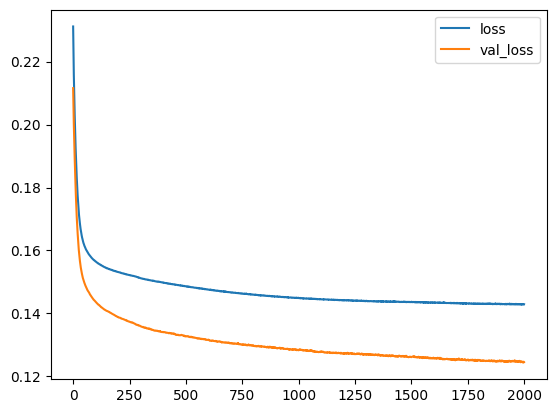

In [103]:
import matplotlib.pyplot as plt

plt.plot(learning.history['loss'], label='loss')
plt.plot(learning.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [104]:
X_test_norm = mms.transform(X_test_array)
prediction = model.predict(X_test_norm[..., np.newaxis])

14/14 [==============================] - 0s 3ms/step


C:\Users\serge\PycharmProjects\Titanic\venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [105]:
prediction

array([[0.8738633 , 0.12613672],
       [0.4495046 , 0.55049545],
       [0.78796417, 0.2120358 ],
       [0.8738633 , 0.12613672],
       [0.5102345 , 0.4897655 ],
       [0.8738633 , 0.12613672],
       [0.38042533, 0.61957467],
       [0.7370836 , 0.26291636],
       [0.38042533, 0.61957467],
       [0.86384964, 0.13615033],
       [0.8738633 , 0.12613672],
       [0.67694956, 0.32305044],
       [0.01072816, 0.9892719 ],
       [0.7805266 , 0.21947344],
       [0.01072816, 0.9892719 ],
       [0.0853734 , 0.91462666],
       [0.78796417, 0.2120358 ],
       [0.8738633 , 0.12613672],
       [0.4495046 , 0.55049545],
       [0.38042533, 0.61957467],
       [0.6560808 , 0.34391922],
       [0.8452322 , 0.15476783],
       [0.00878444, 0.9912156 ],
       [0.6323271 , 0.36767286],
       [0.02636103, 0.973639  ],
       [0.8689377 , 0.13106228],
       [0.01207896, 0.9879211 ],
       [0.8738633 , 0.12613672],
       [0.67694956, 0.32305044],
       [0.86384964, 0.13615033],
       [0.

In [106]:
labels = np.argmax(prediction, axis=1)

In [107]:
labels

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [108]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': labels})

In [109]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [110]:
output.to_csv('submission.csv', index=False)